In [1]:
%run ../scripts/imports.py

with open("../path_data.txt") as f:
    data_dir = f.readline()

Succesfully imported libraries and modules



## Loading patients

In [5]:
# p1 = load_patient(1, data_dir)
# p2 = load_patient(2, data_dir)
# p3 = load_patient(3, data_dir)
# p4 = load_patient(4, data_dir)
# p5 = load_patient(5, data_dir)
# p6 = load_patient(6, data_dir)
# p7 = load_patient(7, data_dir)
# p8 = load_patient(8, data_dir)
p9 = load_patient(9, data_dir)

Patient directory:  C:\Users\aleks\Downloads\data_pac\Patient9


Create 'im' directory in each patient data folder

In [3]:
with open("../path_data.txt", "r") as f:
    data_dir = f.readline()

for i_patient in range(7, 10):
    try:
        os.mkdir(os.path.join(data_dir, f"Patient{i_patient}", "im"))
    except:
        continue

## Saving diagonal PAC images (all patients)

  0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: 'dict' object has no attribute 'pac_matrix'

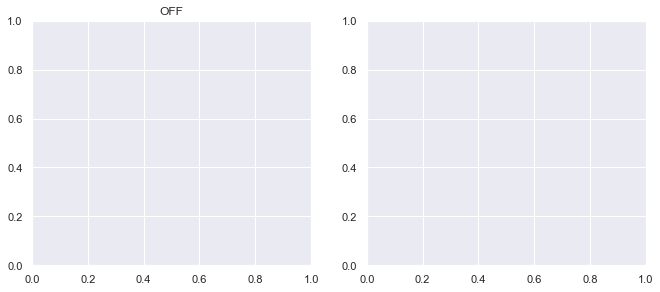

In [6]:
%matplotlib inline
sns.set(context='notebook')

patients = [p9]
days = [1, 5]

for patient in tqdm(patients, total=len(patients)):
    for day in days:
        conditions = [f"{day}Day OFF Rest 180sec", f"{day}Day ON Rest 180sec"]
        folder = os.path.join(patient.root_dir, "im", f"{day}day_OFFvsON", "pac_diag")
        try:
            os.makedirs(folder)
        except:
            pass
        counter = 1
        for i, placement in enumerate(patient.sorted_placements):
            fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
            for j, condition in enumerate(conditions):
                day, ldopa, movement = retrieve_condition_name(condition)
                if condition not in patient.conditions:
                    continue
                lfp = patient.lfp[condition][placement]
                pac = patient.pac[condition][placement][placement]
                ax = axes[j]
                day, ldopa, movement = retrieve_condition_name(condition)
                title = f"{ldopa}"  # without 180sec
                ax.set_title(title)
                sig_pac = get_sig_pac(pac, significance=0.05)
                im = comodulogram(sig_pac, 
                             pac.beta_params, 
                             pac.hfo_params, 
                             pvalues=pac.pvalues, 
                             significant=True, significance=0.05,
                             vmax=0.0005, smooth=True,
                             ax=ax)
                ax.set_xlabel(r"$f_p$, Hz")
                ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
                cbar = fig.colorbar(im, ax=ax)
                cbar.formatter.set_powerlimits((0, 0))
                ax.grid()
            plt.suptitle(f"PAC; {patient.name}; {day}; {movement}; {placement}")
            plt.tight_layout()
            number = str(counter//100) + str(counter//10) + str(counter % 10) 
            fig_name = f"{number}.P{patient.name[-1]}_PAC_OFFvsON_{placement}.png"

            plt.savefig(os.path.join(patient.root_dir, "im", folder, fig_name), dpi=150);
            plt.close(fig)
            counter += 1

### Developing parallel beta and HFO power visualization

In [ ]:
condition = '5Day OFF Rest 180sec'
placement = 'R3C-3B'
patient = p8

lfp = patient.lfp[condition][placement]
pac = patient.pac[condition][placement][placement]



## Saving movement-related PAC images

Rest vs RH vs LH

ON vs OFF

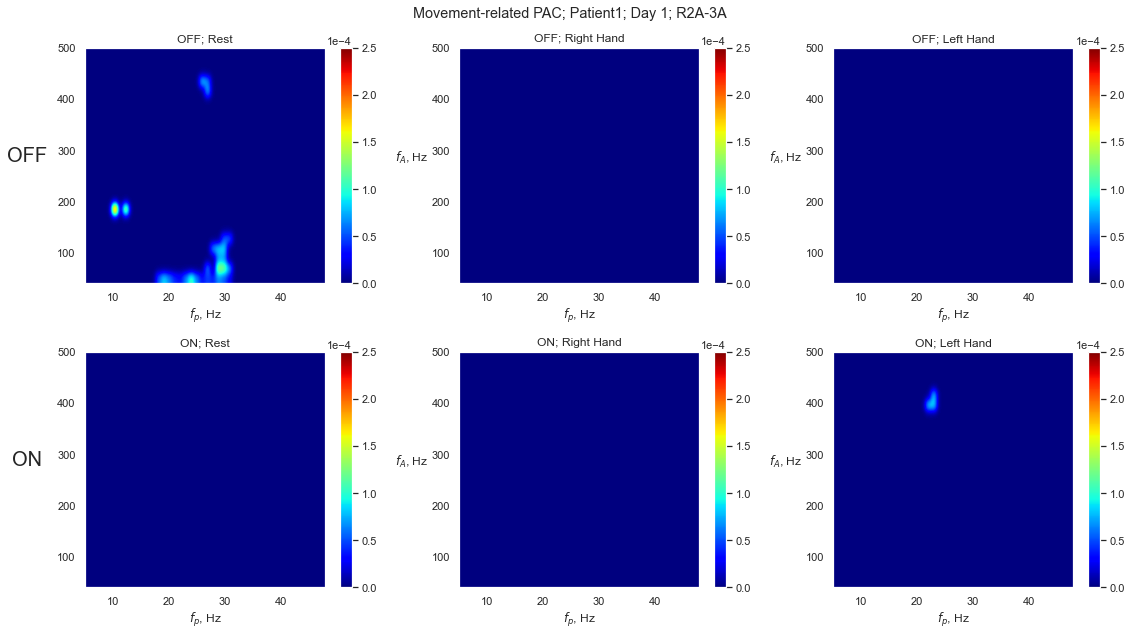

In [30]:
# patient = p1
# day = 1
# placement = "R2A-3A"
# example image:
# |||
# VVV

In [33]:
patients = [p1, p2, p3, p4, p5, p6]
days = [1, 5]
ldopas = ['OFF', 'ON']
movements = ["Rest 180sec", "RH Move 180sec", "LH Move 180sec"]
mov_to_title = {"Rest": "Rest", "RH": "Right Hand", "LH": "Left Hand"}

for patient in tqdm(patients, total=len(patients)):
    for day in days:
        folder = os.path.join(patient.root_dir, "im", f"{day}day_movement_offvson")
        try:
            os.makedirs(folder)
        except:
            pass
        counter = 1
        for placement in patient.sorted_placements:
            fig, axes = plt.subplots(2, 3, figsize=(16, 9))
            for i, ldopa in enumerate(ldopas):
                for j, movement in enumerate(movements):
                    condition = create_condition_name(str(day) + "Day", ldopa, movement)
                    if condition not in patient.conditions:
                        continue
                    lfp = patient.lfp[condition][placement]
                    pac = patient.pac[condition][placement][placement]
                    ax = axes[i, j]

                    mov = movement.split(" ")[0]

                    title = f"{ldopa}; {mov_to_title[mov]}"  # without 180sec
                    ax.set_title(title)
                    sig_pac = get_sig_pac(pac, significance=0.01)
                    im = comodulogram(sig_pac, 
                                 pac.beta_params, 
                                 pac.hfo_params, 
                                 pvalues=pac.pvalues, 
                                 significant=True, significance=0.01,
                                 vmax=0.00025, smooth=True,
                                 ax=ax)

                    ax.set_xlabel(r"$f_p$, Hz")
                    if j != 0: 
                        ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
                    else:
                        ax.set_ylabel(ldopa, labelpad=30, fontsize=20, rotation=0)
                    cbar = fig.colorbar(im, ax=ax)
                    cbar.formatter.set_powerlimits((0, 0))
                    ax.grid()
            plt.suptitle(f"Movement-related PAC; {patient.name}; Day {day}; {placement}")
            plt.tight_layout()
            number = str(counter//100) + str(counter//10) + str(counter % 10) 
            fig_name = f"{number}.P{patient.name[-1]}_PAC_movement_OFFvsON_{placement}.png"

            plt.savefig(os.path.join(patient.root_dir, "im", folder, fig_name), dpi=150);
            plt.close(fig)
            counter += 1

  0%|          | 0/6 [00:00<?, ?it/s]

## Saving cross-PAC images

### Unified code for all days and patients

In [85]:
patient = p3
day = 5

%matplotlib inline
sns.set(context='notebook')

conditions = [f"{day}Day OFF Rest 180sec", f"{day}Day ON Rest 180sec"]
placements = patient.sorted_placements
folder = os.path.join(patient.root_dir, "im", f"{day}dayOFFvsON_cross_pac")
try:
    os.mkdir(folder)
except:
    pass

counter = 0
for pi, pj in tqdm(combinations(placements, 2)):
    
        if not pac_exists(patient, conditions[0], pi, pj):
                continue
        if not pac_exists(patient, conditions[0], pj, pi):
                continue      
                
        fig, axes = plt.subplots(2, 2, figsize=(11, 8))
        for j, condition in enumerate(conditions):
            
            phase, amplitude = pi, pj
            pac = patient.pac[condition][phase][amplitude]
            ax = axes[0, j]
            title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
            ax.set_title(title)
            #lfp.show_psd()
            sig_pac = get_sig_pac(pac, significance=0.01)
            im = comodulogram(sig_pac, 
                         pac.beta_params, 
                         pac.hfo_params, 
                         pvalues=pac.pvalues, 
                         significant=True, significance=0.01,
                         vmax=0.00025, smooth=True,
                         ax=ax)
            ax.set_xlabel(r"$f_p$, Hz")
            ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
            cbar = fig.colorbar(im, ax=ax)
            cbar.formatter.set_powerlimits((0, 0))
            ax.grid()
            
            """ Switched phase and amplitude"""
            phase, amplitude = pj, pi
            pac = patient.pac[condition][phase][amplitude]
            ax = axes[1, j]
            title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
            ax.set_title(title)
            #lfp.show_psd()
            sig_pac = get_sig_pac(pac, significance=0.01)
            im = comodulogram(sig_pac, 
                         pac.beta_params, 
                         pac.hfo_params, 
                         pvalues=pac.pvalues, 
                         significant=True, significance=0.01,
                         vmax=0.00025, smooth=True,
                         ax=ax)
            ax.set_xlabel(r"$f_p$, Hz")
            ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
            cbar = fig.colorbar(im, ax=ax)
            cbar.formatter.set_powerlimits((0, 0))
            ax.grid()
            
            
        plt.tight_layout()
        counter += 1
        number = str(counter//100) + str(counter//10) + str(counter % 10)
        fig_name = f"{number}.P{patient.name[-1]}_{day}day_PAC_OFFvsON_{phase}_{amplitude}.png"
        plt.savefig(os.path.join(patient.root_dir, "im", folder, fig_name), dpi=150);
        plt.close(fig)

0it [00:00, ?it/s]

#### Loop through all patients (save cross-PAC images)

In [7]:
%matplotlib inline
sns.set(context='notebook')

patients = [p9]
significance = 0.05

for patient in patients:
    print(patient.name)
    for day in [1, 5]:
        print(f"Day {day}")

        conditions = [f"{day}Day OFF Rest 180sec", f"{day}Day ON Rest 180sec"]
        placements = patient.sorted_placements
        folder = os.path.join(patient.root_dir, "im", f"{day}dayOFFvsON_cross_pac")
        try:
            os.mkdir(folder)
        except:
            pass

        counter = 0
        for pi, pj in tqdm(combinations(placements, 2)):

                if not pac_exists(patient, conditions[0], pi, pj):
                        continue
                if not pac_exists(patient, conditions[0], pj, pi):
                        continue
                if not pac_exists(patient, conditions[1], pi, pj):
                        continue
                if not pac_exists(patient, conditions[1], pj, pi):
                        continue

                fig, axes = plt.subplots(2, 2, figsize=(11, 8))
                for j, condition in enumerate(conditions):

                    phase, amplitude = pi, pj
                    pac = patient.pac[condition][phase][amplitude]
                    ax = axes[0, j]
                    title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
                    ax.set_title(title)
                    #lfp.show_psd()
                    sig_pac = get_sig_pac(pac, significance=significance)
                    im = comodulogram(sig_pac, 
                                 pac.beta_params, 
                                 pac.hfo_params, 
                                 pvalues=pac.pvalues, 
                                 significant=True, significance=significance,
                                 vmax=0.00025, smooth=True,
                                 ax=ax)
                    ax.set_xlabel(r"$f_p$, Hz")
                    ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
                    cbar = fig.colorbar(im, ax=ax)
                    cbar.formatter.set_powerlimits((0, 0))
                    ax.grid()

                    """ Switched phase and amplitude"""
                    phase, amplitude = pj, pi
                    pac = patient.pac[condition][phase][amplitude]
                    ax = axes[1, j]
                    title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
                    ax.set_title(title)
                    #lfp.show_psd()
                    sig_pac = get_sig_pac(pac, significance=0.01, mask_lonely=True, min_cluster_size=3)
                    im = comodulogram(sig_pac, 
                                 pac.beta_params, 
                                 pac.hfo_params, 
                                 pvalues=pac.pvalues, 
                                 significant=True, significance=0.01,
                                 vmax=0.00025, smooth=True,
                                 ax=ax)
                    ax.set_xlabel(r"$f_p$, Hz")
                    ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
                    cbar = fig.colorbar(im, ax=ax)
                    cbar.formatter.set_powerlimits((0, 0))
                    ax.grid()


                plt.tight_layout()
                counter += 1
                number = str(counter//100) + str(counter//10) + str(counter % 10)
                fig_name = f"{number}.P{patient.name[-1]}_{day}day_PAC_OFFvsON_{phase}_{amplitude}.png"
                plt.savefig(os.path.join(patient.root_dir, "im", folder, fig_name), dpi=250);
                plt.close(fig)

Patient9
Day 1


0it [00:00, ?it/s]

Day 5


0it [00:00, ?it/s]